In [1]:
import pandas as pd

ankle_path = 'PositionDatasets/Ankle_dataset.csv'
belt_path = 'PositionDatasets/Belt_dataset.csv'
neck_path = 'PositionDatasets/Neck_dataset.csv'
pocket_path = 'PositionDatasets/Pocket_dataset.csv'
wrist_path = 'PositionDatasets/Wrist_dataset.csv'

Ankle = pd.read_csv(ankle_path)
Belt = pd.read_csv(belt_path)
Neck = pd.read_csv(neck_path)
Pocket = pd.read_csv(pocket_path)
Wrist = pd.read_csv(wrist_path)

Ankle.info()
Belt.info()
Neck.info()
Pocket.info()
Wrist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   TimeStamp     294678 non-null  object 
 1   Ankle_acc_x   294678 non-null  float64
 2   Ankle_acc_y   294678 non-null  float64
 3   Ankle_acc_z   294678 non-null  float64
 4   Ankle_gyro_x  294678 non-null  float64
 5   Ankle_gyro_y  294678 non-null  float64
 6   Ankle_gyro_z  294678 non-null  float64
 7   Subject       294678 non-null  int64  
 8   Activity      294678 non-null  int64  
 9   Trial         294678 non-null  int64  
 10  Tag           294678 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 24.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   TimeStamp    294678 non-null  object 
 1   Belt_acc_

In [2]:
print(Ankle.isnull().sum())
print(Belt.isnull().sum())
print(Neck.isnull().sum())
print(Pocket.isnull().sum())
print(Wrist.isnull().sum())

TimeStamp       0
Ankle_acc_x     0
Ankle_acc_y     0
Ankle_acc_z     0
Ankle_gyro_x    0
Ankle_gyro_y    0
Ankle_gyro_z    0
Subject         0
Activity        0
Trial           0
Tag             0
dtype: int64
TimeStamp      0
Belt_acc_x     0
Belt_acc_y     0
Belt_acc_z     0
Belt_gyro_x    0
Belt_gyro_y    0
Belt_gyro_z    0
Subject        0
Activity       0
Trial          0
Tag            0
dtype: int64
TimeStamp      0
Neck_acc_x     0
Neck_acc_y     0
Neck_acc_z     0
Neck_gyro_x    0
Neck_gyro_y    0
Neck_gyro_z    0
Subject        0
Activity       0
Trial          0
Tag            0
dtype: int64
TimeStamp            0
Pocket_acc_x     36109
Pocket_acc_y     36109
Pocket_acc_z     36109
Pocket_gyro_x    36109
Pocket_gyro_y    36109
Pocket_gyro_z    36109
Subject              0
Activity             0
Trial                0
Tag                  0
dtype: int64
TimeStamp       0
Wrist_acc_x     0
Wrist_acc_y     0
Wrist_acc_z     0
Wrist_gyro_x    0
Wrist_gyro_y    0
Wrist_gyro_z   

In [3]:
Pocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TimeStamp      294678 non-null  object 
 1   Pocket_acc_x   258569 non-null  float64
 2   Pocket_acc_y   258569 non-null  float64
 3   Pocket_acc_z   258569 non-null  float64
 4   Pocket_gyro_x  258569 non-null  float64
 5   Pocket_gyro_y  258569 non-null  float64
 6   Pocket_gyro_z  258569 non-null  float64
 7   Subject        294678 non-null  int64  
 8   Activity       294678 non-null  int64  
 9   Trial          294678 non-null  int64  
 10  Tag            294678 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 24.7+ MB


In [3]:
import pandas as pd

# Remove rows with any null value, modifying 'df' directly
Pocket.dropna(inplace=True)


In [4]:
Pocket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258569 entries, 0 to 294677
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TimeStamp      258569 non-null  object 
 1   Pocket_acc_x   258569 non-null  float64
 2   Pocket_acc_y   258569 non-null  float64
 3   Pocket_acc_z   258569 non-null  float64
 4   Pocket_gyro_x  258569 non-null  float64
 5   Pocket_gyro_y  258569 non-null  float64
 6   Pocket_gyro_z  258569 non-null  float64
 7   Subject        258569 non-null  int64  
 8   Activity       258569 non-null  int64  
 9   Trial          258569 non-null  int64  
 10  Tag            258569 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 23.7+ MB


In [5]:
import pandas as pd

ankle_path = 'PositionDatasets/Ankle_dataset.csv'
Ankle = pd.read_csv(ankle_path)

def increase_samples_by_mean(df):
    """
    Increases the number of samples in the DataFrame by taking two consecutive
    samples, finding their mean, and adding it in between, trial by trial.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A new DataFrame with the increased number of samples.
    """
    if 'TimeStamp' not in df.columns:
        print("Error: 'TimeStamp' column not found in DataFrame.")
        return df

    categorical_cols = ['Subject', 'Activity', 'Trial']
    if 'Tag' in df.columns:
        categorical_cols.append('Tag')
    sensor_cols = [col for col in df.columns if col not in ['TimeStamp'] + categorical_cols]

    df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

    processed_trials = []
    grouped = df.groupby(categorical_cols)

    for name, group in grouped:
        group = group.sort_values(by='TimeStamp').reset_index(drop=True)
        new_rows = []
        for i in range(len(group) - 1):
            row1 = group.iloc[i]
            row2 = group.iloc[i + 1]

            # Calculate mean of sensor values
            mean_sensors = ((row1[sensor_cols] + row2[sensor_cols]) / 2).to_dict()

            # Calculate midpoint timestamp
            mid_time = row1['TimeStamp'] + (row2['TimeStamp'] - row1['TimeStamp']) / 2

            # Create new row
            new_row = {}
            new_row['TimeStamp'] = mid_time
            for cat_col, val in zip(categorical_cols, name):
                new_row[cat_col] = val
            new_row.update(mean_sensors)

            new_rows.append(pd.Series(new_row))

        # Interleave original and new rows
        interpolated_group = pd.DataFrame()
        for i in range(len(group) - 1):
            interpolated_group = pd.concat([interpolated_group, group.iloc[[i]]], ignore_index=True)
            interpolated_group = pd.concat([interpolated_group, new_rows[i].to_frame().T], ignore_index=True)
        interpolated_group = pd.concat([interpolated_group, group.iloc[[-1]]], ignore_index=True) # Add the last original row

        processed_trials.append(interpolated_group)

    final_df = pd.concat(processed_trials).sort_values(by=['Subject', 'Activity', 'Trial', 'TimeStamp']).reset_index(drop=True)
    return final_df

# Filter the Ankle dataset for Subject=1, Activity=1, Trial=1
ankle_subset = Ankle[
    (Ankle['Subject'] == 1) &
    (Ankle['Activity'] == 1) &
    (Ankle['Trial'] == 1)
].copy()

print("Original number of samples in the subset:", len(ankle_subset))

# Increase samples for the subset
increased_ankle_subset = increase_samples_by_mean(ankle_subset.copy())

print("Number of samples after increasing (mean method):", len(increased_ankle_subset))

# You can now work with the 'increased_ankle_subset' DataFrame
# For example, you can print its head to see the result:
# print("\nFirst few rows of the increased subset:")
# print(increased_ankle_subset.head())

Original number of samples in the subset: 195
Number of samples after increasing (mean method): 387


In [14]:
ankle_subset

,TimeStamp,Ankle_acc_x,Ankle_acc_y,Ankle_acc_z,Ankle_gyro_x,Ankle_gyro_y,Ankle_gyro_z,Subject,Activity,Trial,Tag
0,2018-07-04T12:04:17.738,-1.005,0.229,-0.083,-0.671,0.488,-2.683,1,1,1,7
1,2018-07-04T12:04:17.791,-1.005,0.228,-0.082,-3.415,-0.549,0.122,1,1,1,7
2,2018-07-04T12:04:17.837,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,1,1,1,7
3,2018-07-04T12:04:17.885,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,1,1,1,7
4,2018-07-04T12:04:17.945,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...
190,2018-07-04T12:04:27.430,-0.211,-0.977,0.055,-1.037,0.732,-0.732,1,1,1,11
191,2018-07-04T12:04:27.485,-0.218,-0.979,0.061,-0.915,0.610,0.427,1,1,1,11
192,2018-07-04T12:04:27.526,-0.218,-0.979,0.061,-0.732,0.488,0.366,1,1,1,11
193,2018-07-04T12:04:27.570,-0.220,-0.983,0.056,-0.305,0.427,0.244,1,1,1,11


In [13]:
increased_ankle_subset


,TimeStamp,Ankle_acc_x,Ankle_acc_y,Ankle_acc_z,Ankle_gyro_x,Ankle_gyro_y,Ankle_gyro_z,Subject,Activity,Trial,Tag
0,2018-07-04 12:04:17.738000,-1.005,0.229,-0.083,-0.671,0.488,-2.683,1,1,1,7
1,2018-07-04 12:04:17.764500,-1.005,0.2285,-0.0825,-2.043,-0.0305,-1.2805,1,1,1,7
2,2018-07-04 12:04:17.791000,-1.005,0.228,-0.082,-3.415,-0.549,0.122,1,1,1,7
3,2018-07-04 12:04:17.814000,-1.005,0.2295,-0.0805,-3.0185,-0.9755,-0.2135,1,1,1,7
4,2018-07-04 12:04:17.837000,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...
382,2018-07-04 12:04:27.526000,-0.218,-0.979,0.061,-0.732,0.488,0.366,1,1,1,11
383,2018-07-04 12:04:27.548000,-0.219,-0.981,0.0585,-0.5185,0.4575,0.305,1,1,1,11
384,2018-07-04 12:04:27.570000,-0.22,-0.983,0.056,-0.305,0.427,0.244,1,1,1,11
385,2018-07-04 12:04:27.594500,-0.22,-0.983,0.056,-0.305,0.488,0.1525,1,1,1,11


C:\Users\pradip\AppData\Local\Temp\ipykernel_14476\735638028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['TimeStamp'] = pd.to_datetime(filtered_data['TimeStamp'])


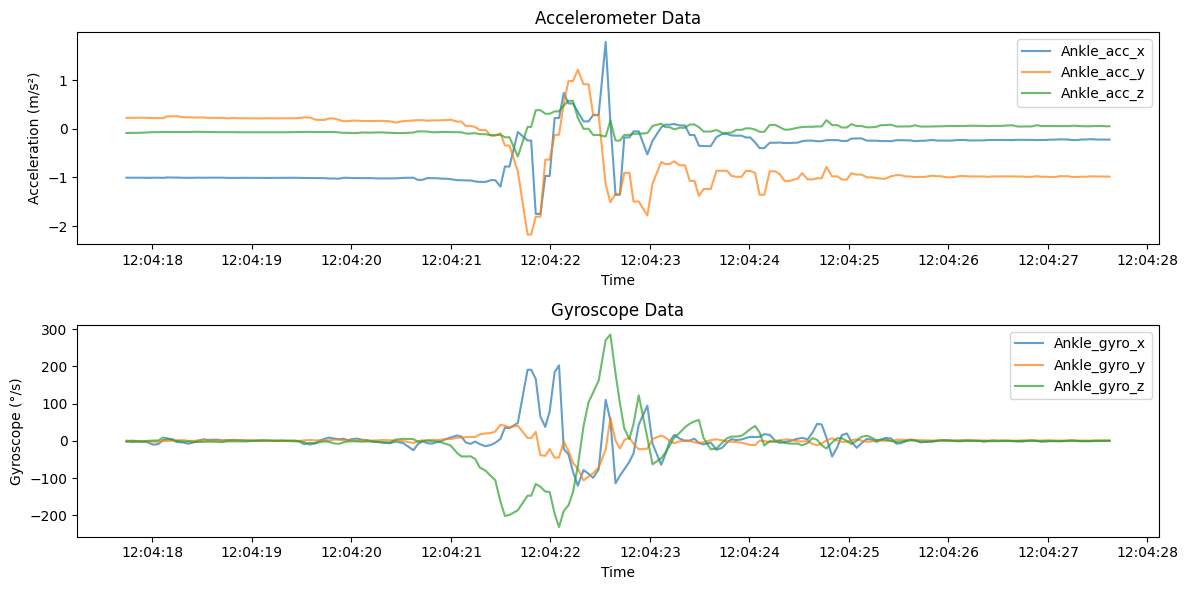

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for Subject=1, Activity=1, and Trial=1
filtered_data = Ankle[(Ankle['Subject'] == 1) & (Ankle['Activity'] == 1) & (Ankle['Trial'] == 1)]

# Convert 'TimeStamp' to datetime
filtered_data['TimeStamp'] = pd.to_datetime(filtered_data['TimeStamp'])

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_acc_x'], label='Ankle_acc_x', alpha=0.7)
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_acc_y'], label='Ankle_acc_y', alpha=0.7)
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_acc_z'], label='Ankle_acc_z', alpha=0.7)
plt.title('Accelerometer Data')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)')
plt.legend()

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_gyro_x'], label='Ankle_gyro_x', alpha=0.7)
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_gyro_y'], label='Ankle_gyro_y', alpha=0.7)
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_gyro_z'], label='Ankle_gyro_z', alpha=0.7)
plt.title('Gyroscope Data')
plt.xlabel('Time')
plt.ylabel('Gyroscope (°/s)')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


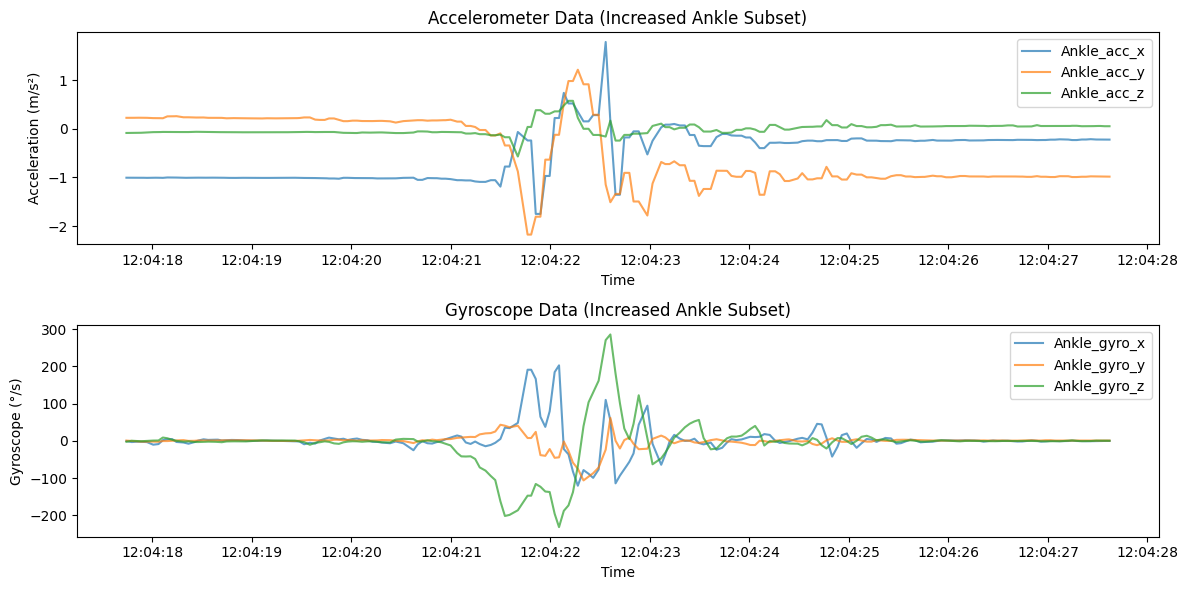

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for Subject=1, Activity=1, and Trial=1
filtered_data = increased_ankle_subset[(increased_ankle_subset['Subject'] == 1) & 
                                       (increased_ankle_subset['Activity'] == 1) & 
                                       (increased_ankle_subset['Trial'] == 1)]

# Convert 'TimeStamp' to datetime
filtered_data['TimeStamp'] = pd.to_datetime(filtered_data['TimeStamp'])

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_acc_x'], label='Ankle_acc_x', alpha=0.7)
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_acc_y'], label='Ankle_acc_y', alpha=0.7)
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_acc_z'], label='Ankle_acc_z', alpha=0.7)
plt.title('Accelerometer Data (Increased Ankle Subset)')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)')
plt.legend()

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_gyro_x'], label='Ankle_gyro_x', alpha=0.7)
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_gyro_y'], label='Ankle_gyro_y', alpha=0.7)
plt.plot(filtered_data['TimeStamp'], filtered_data['Ankle_gyro_z'], label='Ankle_gyro_z', alpha=0.7)
plt.title('Gyroscope Data (Increased Ankle Subset)')
plt.xlabel('Time')
plt.ylabel('Gyroscope (°/s)')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import os

ankle_path = 'PositionDatasets/Ankle_dataset.csv'
belt_path = 'PositionDatasets/Belt_dataset.csv'
neck_path = 'PositionDatasets/Neck_dataset.csv'
pocket_path = 'PositionDatasets/Pocket_dataset.csv'
wrist_path = 'PositionDatasets/Wrist_dataset.csv'

Ankle = pd.read_csv(ankle_path)
Belt = pd.read_csv(belt_path)
Neck = pd.read_csv(neck_path)
Pocket = pd.read_csv(pocket_path)
Wrist = pd.read_csv(wrist_path)

# Remove rows with any null value in Pocket dataset
Pocket.dropna(inplace=True)

def increase_samples_by_mean(df):
    """
    Increases the number of samples in the DataFrame by taking two consecutive
    samples, finding their mean, and adding it in between, trial by trial.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A new DataFrame with the increased number of samples.
    """
    if 'TimeStamp' not in df.columns:
        print("Error: 'TimeStamp' column not found in DataFrame.")
        return df

    categorical_cols = ['Subject', 'Activity', 'Trial']
    if 'Tag' in df.columns:
        categorical_cols.append('Tag')
    sensor_cols = [col for col in df.columns if col not in ['TimeStamp'] + categorical_cols]

    df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

    processed_trials = []
    grouped = df.groupby(categorical_cols)

    for name, group in grouped:
        group = group.sort_values(by='TimeStamp').reset_index(drop=True)
        new_rows = []
        for i in range(len(group) - 1):
            row1 = group.iloc[i]
            row2 = group.iloc[i + 1]

            # Calculate mean of sensor values
            mean_sensors = ((row1[sensor_cols] + row2[sensor_cols]) / 2).to_dict()

            # Calculate midpoint timestamp
            mid_time = row1['TimeStamp'] + (row2['TimeStamp'] - row1['TimeStamp']) / 2

            # Create new row
            new_row = {}
            new_row['TimeStamp'] = mid_time
            for cat_col, val in zip(categorical_cols, name):
                new_row[cat_col] = val
            new_row.update(mean_sensors)

            new_rows.append(pd.Series(new_row))

        # Interleave original and new rows
        interpolated_group = pd.DataFrame()
        for i in range(len(group) - 1):
            interpolated_group = pd.concat([interpolated_group, group.iloc[[i]]], ignore_index=True)
            interpolated_group = pd.concat([interpolated_group, new_rows[i].to_frame().T], ignore_index=True)
        interpolated_group = pd.concat([interpolated_group, group.iloc[[-1]]], ignore_index=True) # Add the last original row

        processed_trials.append(interpolated_group)

    final_df = pd.concat(processed_trials).sort_values(by=['Subject', 'Activity', 'Trial', 'TimeStamp']).reset_index(drop=True)
    return final_df

# Create a dictionary to store the datasets with increased samples
increased_datasets_mean = {}

# Process each dataset
datasets = {'Ankle': Ankle, 'Belt': Belt, 'Neck': Neck, 'Pocket': Pocket, 'Wrist': Wrist}

for name, df in datasets.items():
    print(f"Processing {name} dataset using mean method...")
    original_length = len(df)
    increased_df_mean = increase_samples_by_mean(df.copy())
    increased_datasets_mean[name] = increased_df_mean
    print(f"  Original number of samples: {original_length}")
    print(f"  Number of samples after doubling (approx.): {len(increased_df_mean)}")

# Save the increased datasets to new CSV files
output_directory = 'IncreasedDatasetsMean'
os.makedirs(output_directory, exist_ok=True) # Create the directory if it doesn't exist

for dataset_name, increased_df in increased_datasets_mean.items():
    new_file_name = os.path.join(output_directory, f'IncreasedMean_{dataset_name}_dataset.csv')
    increased_df.to_csv(new_file_name, index=False)
    print(f"Saved increased '{dataset_name}' dataset (mean method) to '{new_file_name}' in the '{output_directory}' directory")

print("\nAll increased datasets have been processed and saved using the mean method.")

Processing Ankle dataset using mean method...
  Original number of samples: 294678
  Number of samples after doubling (approx.): 588228
Processing Belt dataset using mean method...
  Original number of samples: 294678
  Number of samples after doubling (approx.): 588228
Processing Neck dataset using mean method...
  Original number of samples: 294678
  Number of samples after doubling (approx.): 588228
Processing Pocket dataset using mean method...
  Original number of samples: 258569
  Number of samples after doubling (approx.): 516142
Processing Wrist dataset using mean method...
  Original number of samples: 294678
  Number of samples after doubling (approx.): 588228
Saved increased 'Ankle' dataset (mean method) to 'IncreasedDatasetsMean\IncreasedMean_Ankle_dataset.csv' in the 'IncreasedDatasetsMean' directory
Saved increased 'Belt' dataset (mean method) to 'IncreasedDatasetsMean\IncreasedMean_Belt_dataset.csv' in the 'IncreasedDatasetsMean' directory
Saved increased 'Neck' dataset 